In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Testing functions

In [2]:
def compare_2images(original , processed):
    plt.figure(figsize=(10,20))

    plt.subplot(121)
    plt.imshow(original, cmap='gray')
    plt.axis('off')
    plt.title("orignal")
    
    plt.subplot(122)
    plt.imshow(processed, cmap='gray')
    plt.axis('off')
    plt.title("after processing")
    plt.show()    


def try_all_images(func , process):
    images = [
        "frame1.png",
        "frame2.png",
        "frame3.png",
        "original.png",
        "real.jpg",
        "real2.jpg",
        "real3.jpg",
        "real4.png",
    ]

    for image in images:
        img = cv.imread("./shapes/"+image)
        # # for fast testing
        # cv.imwrite(f"./shapes/{process}/"+image, func(img))
        compare_2images(img , func(img))

# Trying different gaussian Blurring 

In [3]:
def gaussian(img):
    gaussian = cv.GaussianBlur( img, (3, 3), 0)
    return gaussian

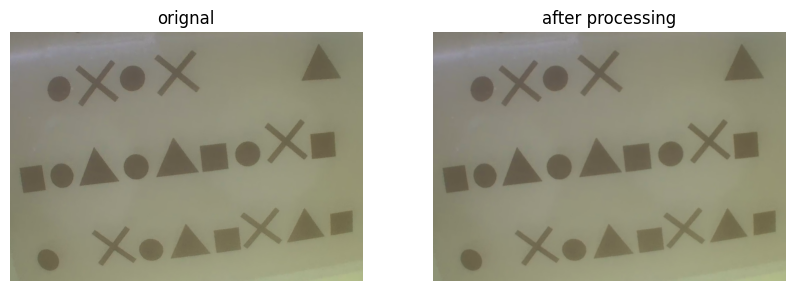

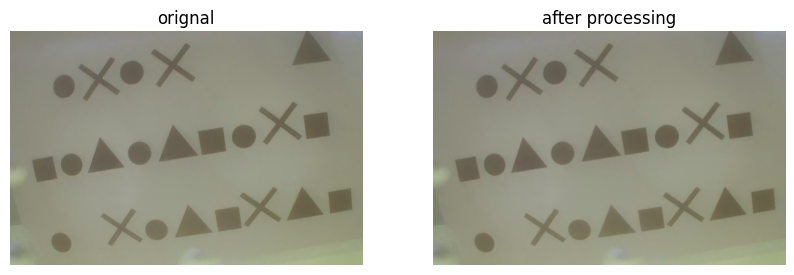

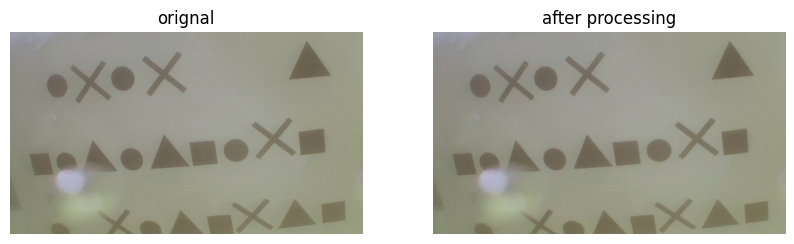

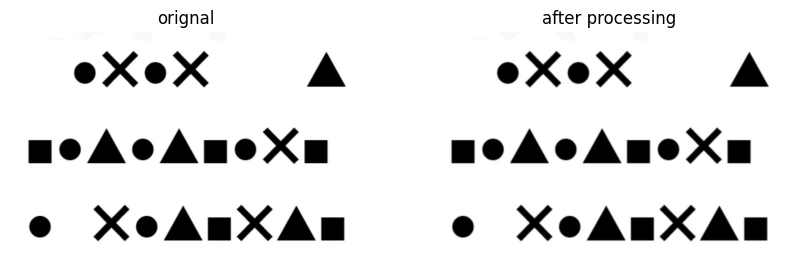

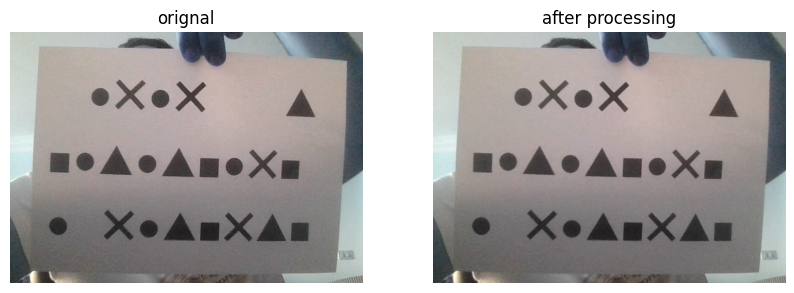

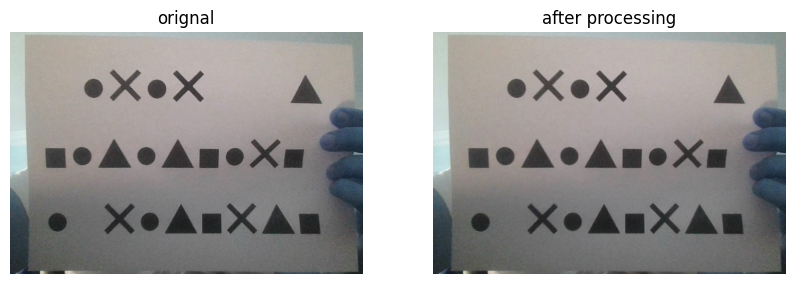

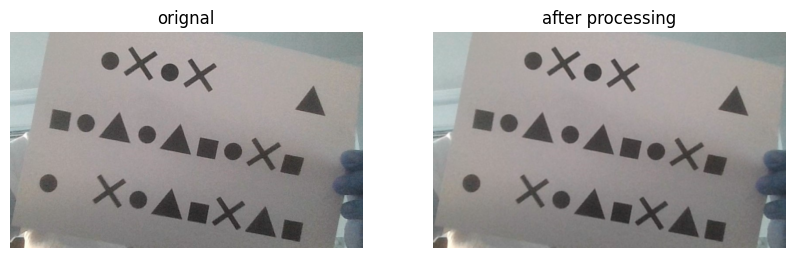

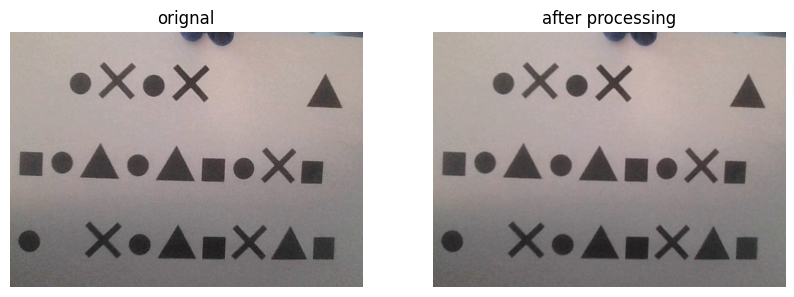

In [4]:
try_all_images(gaussian , "gaussian")

# Trying threshold to detect black shapes ❌

In [5]:
def threshold(img):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    filtered = gaussian(gray)
    _, thresh = cv.threshold(filtered, 110, 255, cv.THRESH_BINARY_INV)
    return thresh

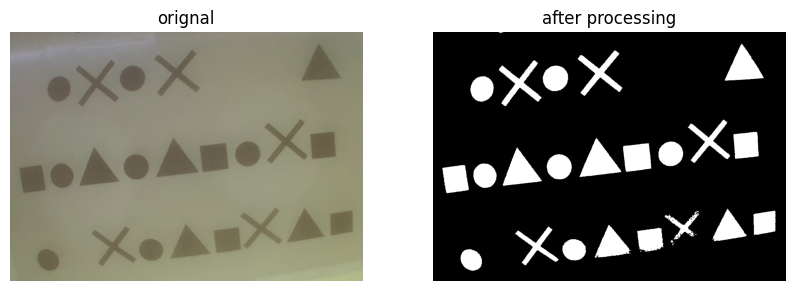

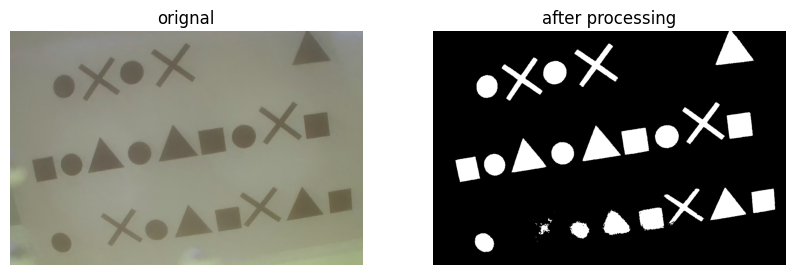

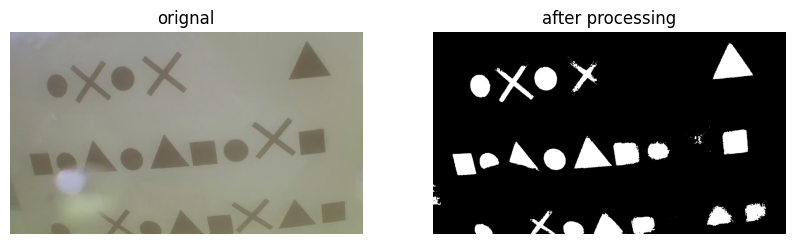

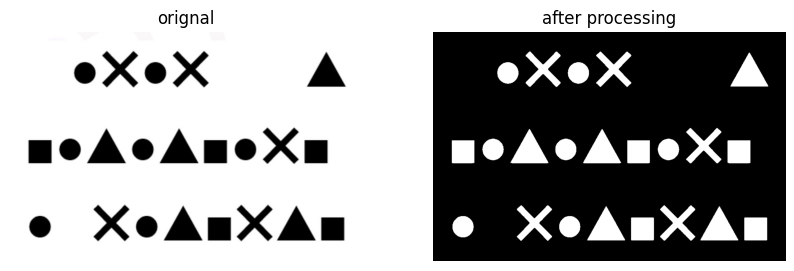

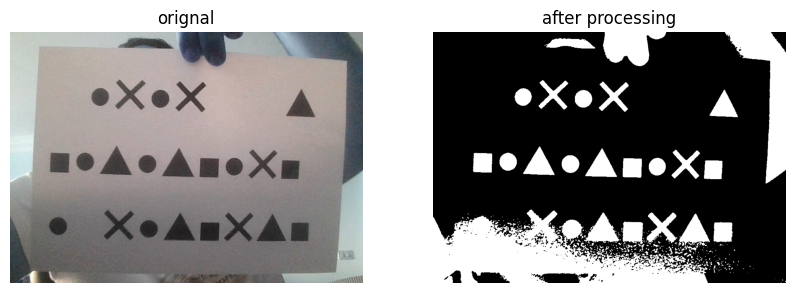

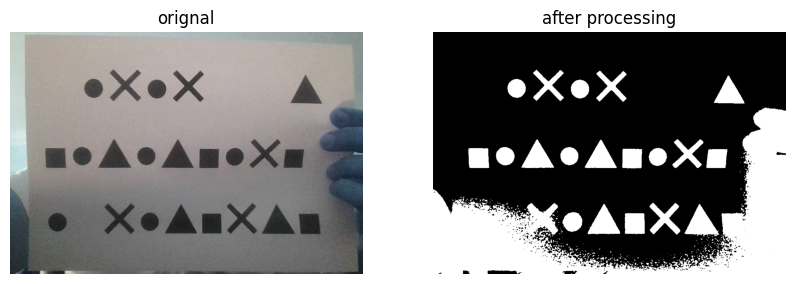

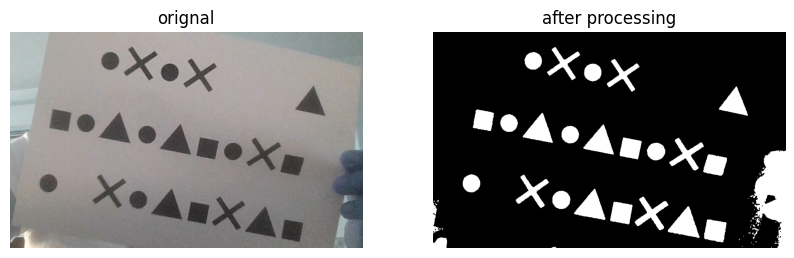

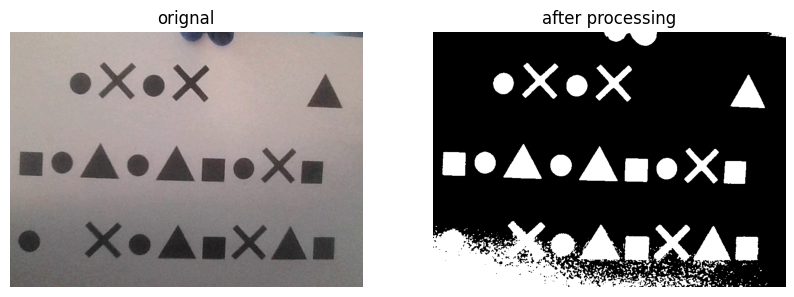

In [6]:
try_all_images(threshold , "threshold")

# trying HSV color detection ❌

### Defining initial values for h, s, v

In [7]:
h1 = 0
h2 = 360
s1 = 0
s2 = 255
v1 = 0
v2 = 10

In [8]:
def black_only_mask(img):
    img = cv.GaussianBlur(img, (5, 5), 0)
    
    hsv_image = cv.cvtColor(img, cv.COLOR_BGR2HSV)

    lower_bound = np.array([h1 , s1, v1])
    upper_bound = np.array([h2 , s2 , v2])

    mask = cv.inRange(hsv_image, lower_bound, upper_bound)
    mask = cv.bitwise_not(mask)
    return mask

### Tuning Global boundaries h, s ,v until reaching optimum solution

In [9]:
h1 = 0
h2 = 360
s1 = 0
s2 = 255
v1 = 123
v2 = 255

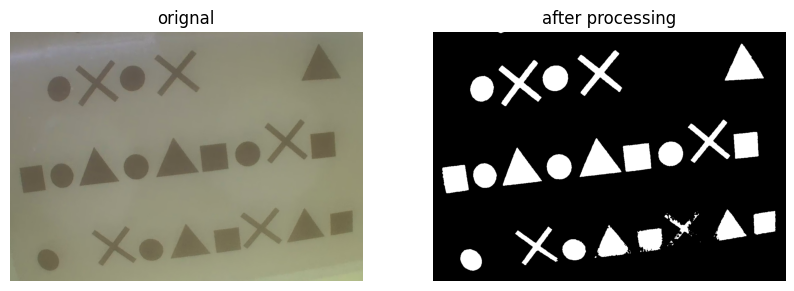

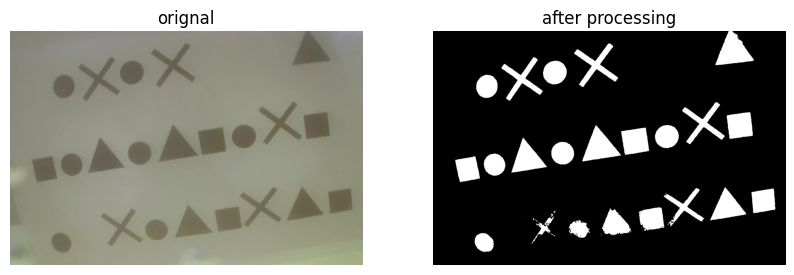

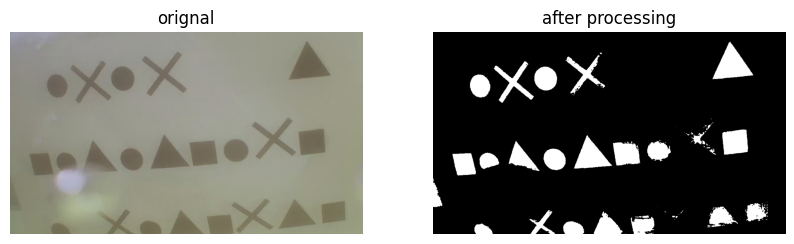

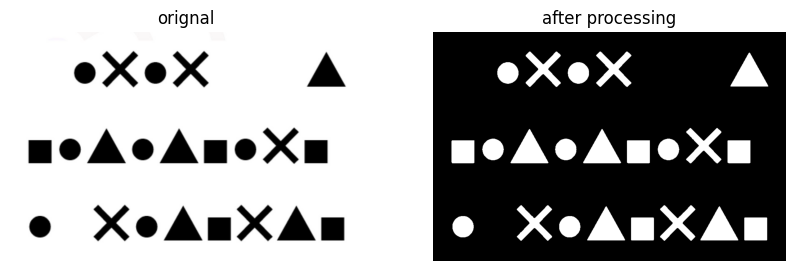

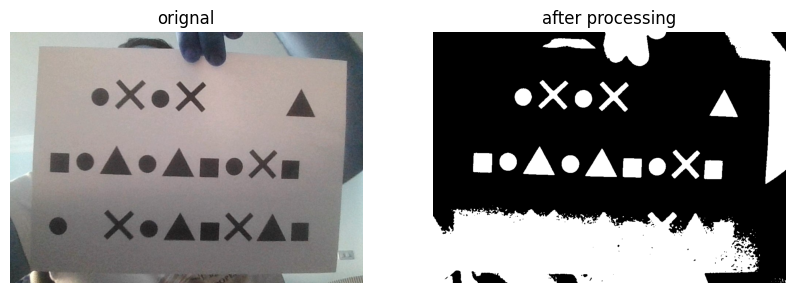

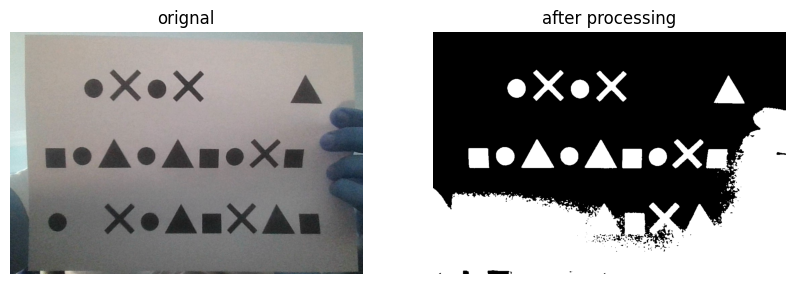

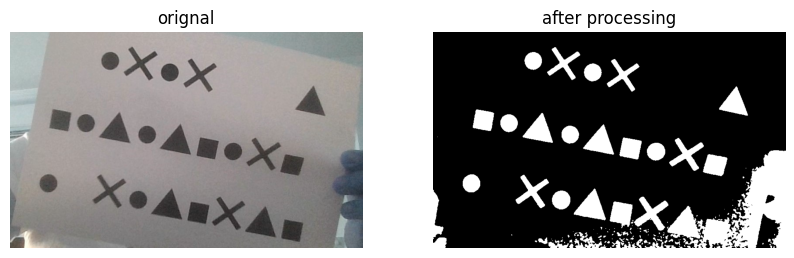

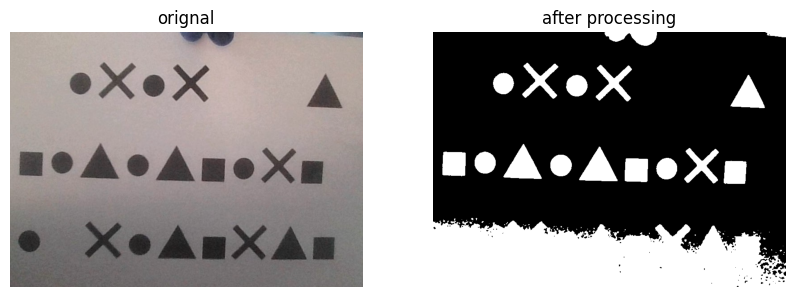

In [10]:
try_all_images(black_only_mask,  "select_black_only")

# Tying Applying Canny

In [11]:
# blurring helps to close the gaps between the edges

def canny(img):
    img = cv.GaussianBlur(img, (3, 3), 0)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    gray = cv.blur(gray , (3 , 3) , 0)
    # 30 and 20
    canny_img = cv.Canny(gray, 40 , 80)
    return cv.blur(canny_img , (3,3) , 0)


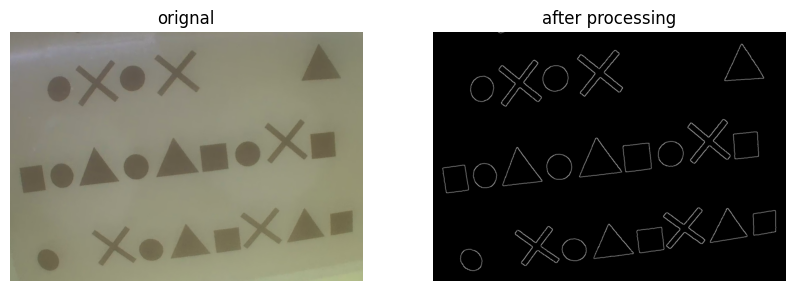

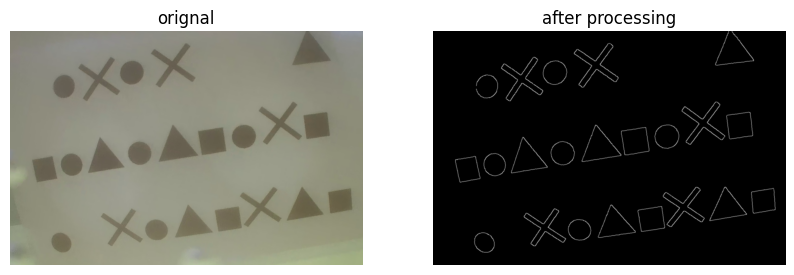

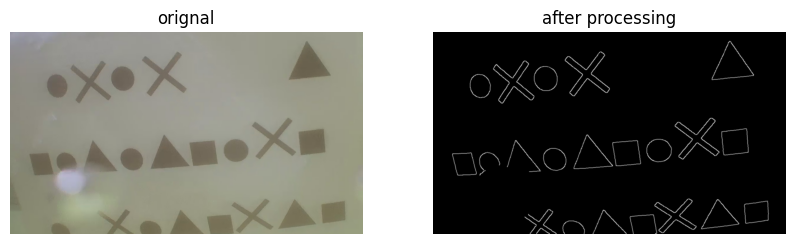

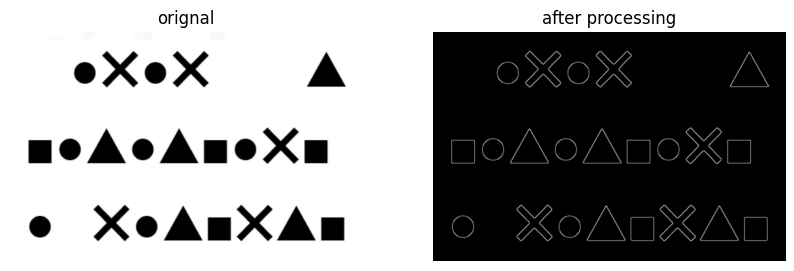

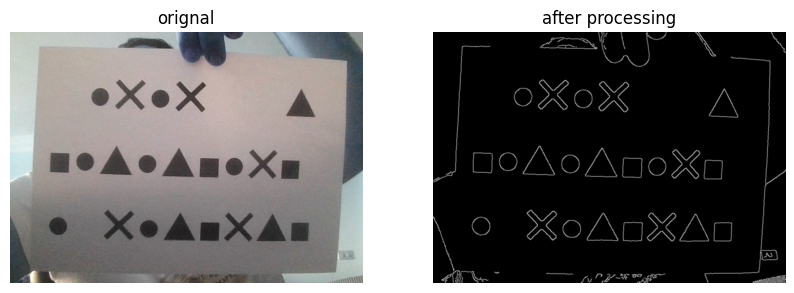

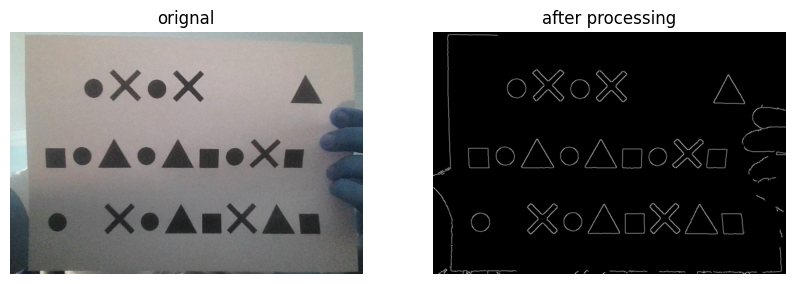

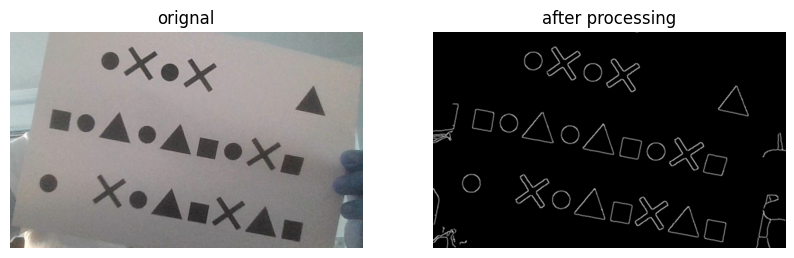

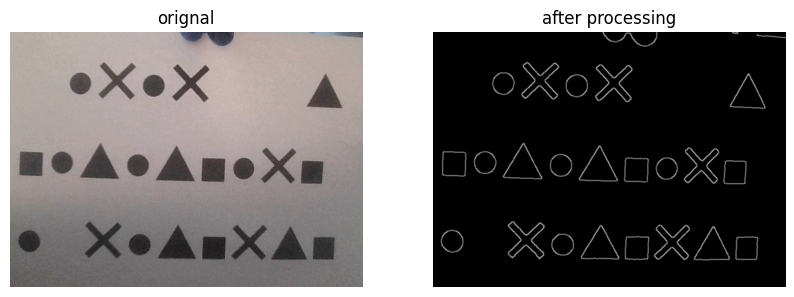

In [12]:
try_all_images(canny , "canny")

# Trying Detecting Circles

In [13]:
def detect_circles( img_to_detect , img_to_draw = None  ):
    if(type(img_to_draw) == type(None)) : img_to_draw = img_to_detect.copy()
    gray = cv.cvtColor(img_to_detect, cv.COLOR_BGR2GRAY)
    filtered = cv.GaussianBlur(gray, (3, 3), 1)
    circles = cv.HoughCircles(filtered, method=cv.HOUGH_GRADIENT, dp=1, minDist=20, 
                            param1=100, param2=22, minRadius=20, maxRadius=60)

    if circles is not None:
        circles = np.uint16(np.around(circles))

        for i in circles[0, :]:
            center = (i[0], i[1])
            radius = i[2]
            cv.circle(img_to_draw, center, radius, (255, 255, 0), 3)
        
    return img_to_draw


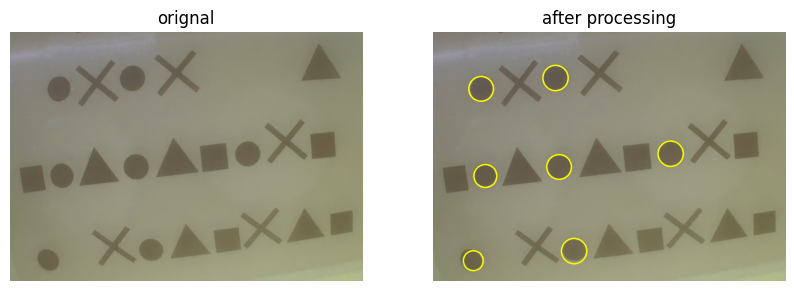

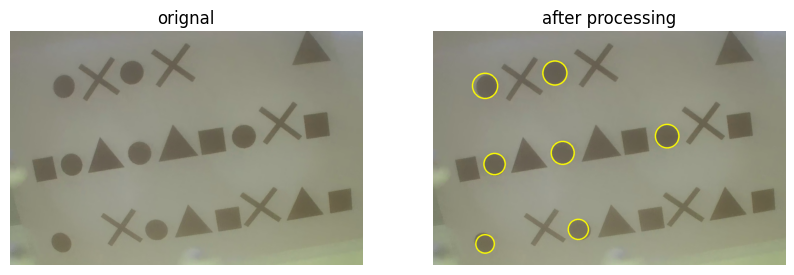

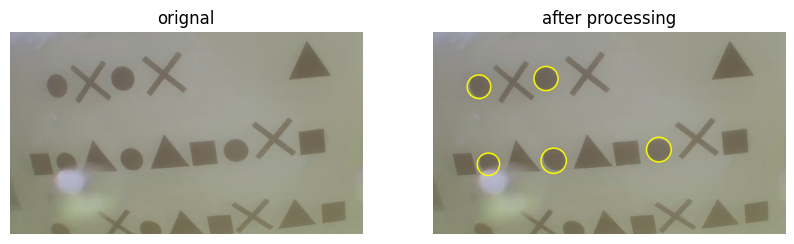

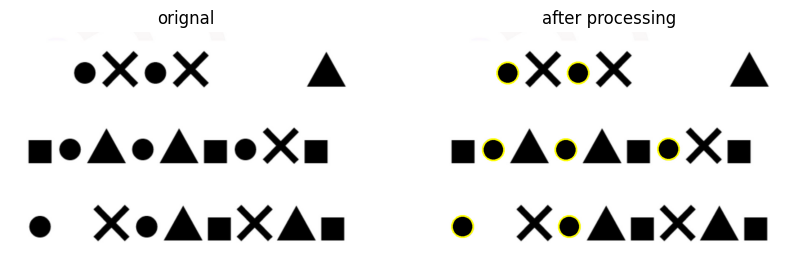

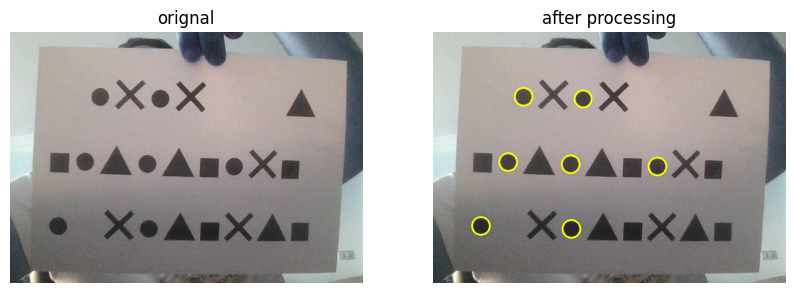

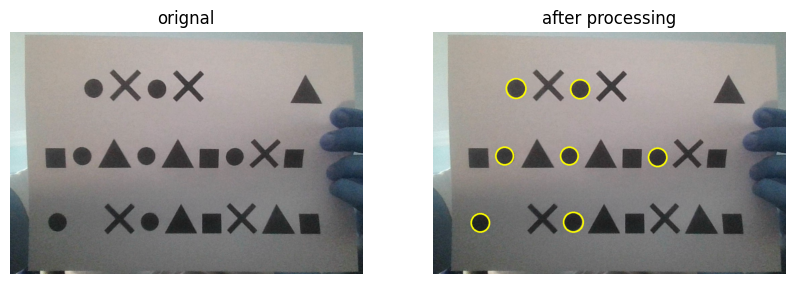

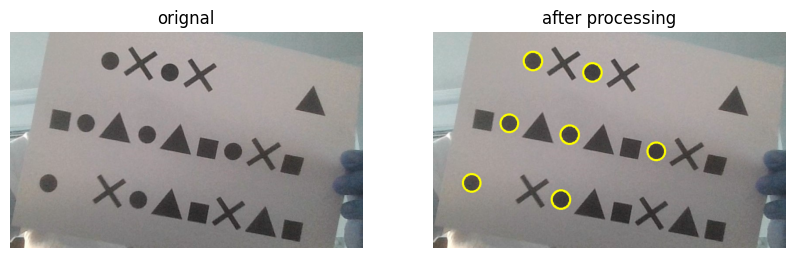

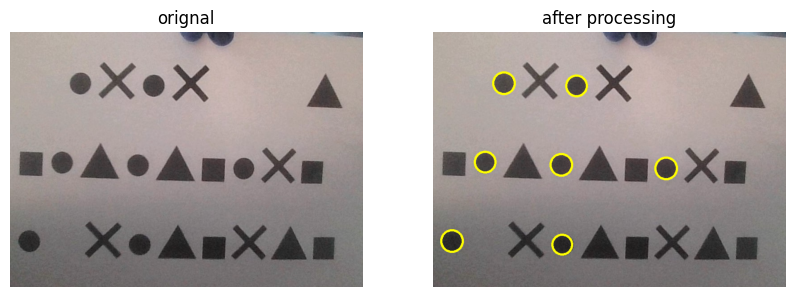

In [14]:
try_all_images(detect_circles , "circles")

# adding them all together

In [15]:
def detect_shapes(img):
    img_copy = img.copy()
    canny_img = canny(img)
    contours , _ = cv.findContours(canny_img, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

    for contour in contours:
        # for rectangles and triangles
        approx = cv.approxPolyDP(contour, 0.022*cv.arcLength(contour, True), True)
        # for x shapes
        x_approx = cv.approxPolyDP(contour, 6.9, True)
        

        if(approx.shape[0] == 3):
            cv.drawContours(img_copy, [approx], 0, (255, 0, 0), 3)
        elif (approx.shape[0] == 4):
            cv.drawContours(img_copy, [approx], 0, (0, 255, 0), 3)
        if(x_approx.shape[0] >= 10 and x_approx.shape[0] <= 14):
            cv.drawContours(img_copy, [x_approx], 0, (0, 255, 255), 5)
        

    detect_circles(img , img_copy)
        
    return img_copy    


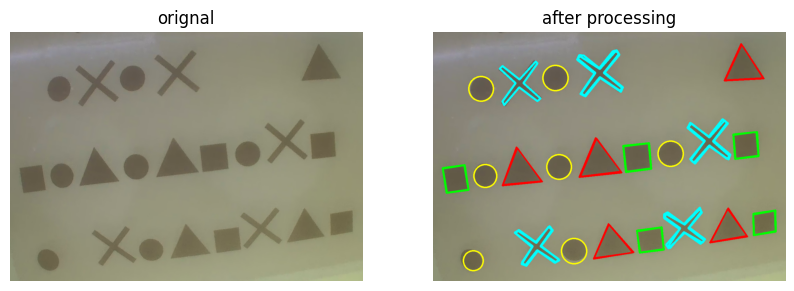

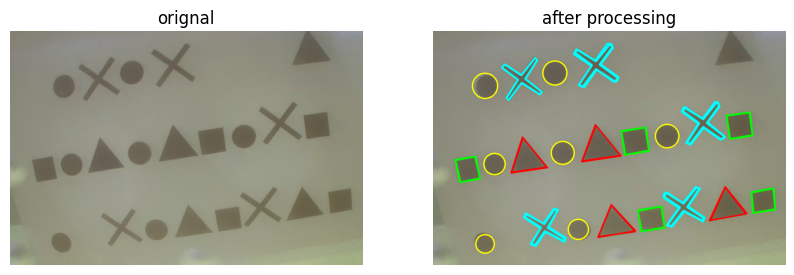

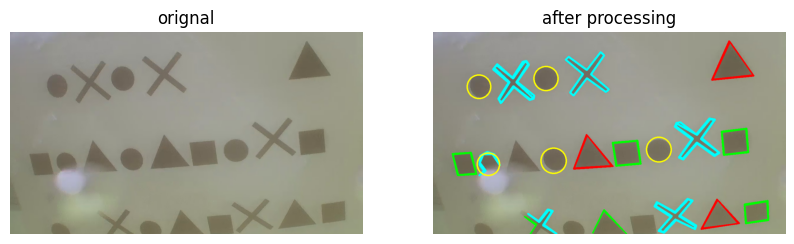

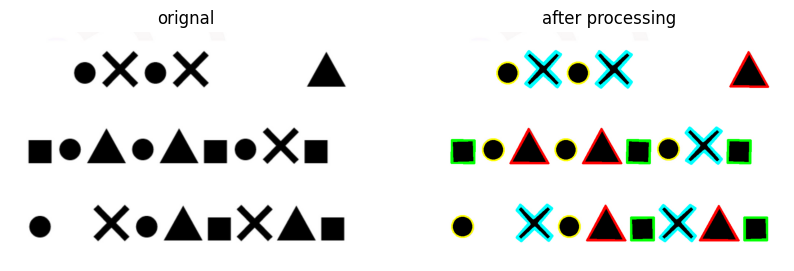

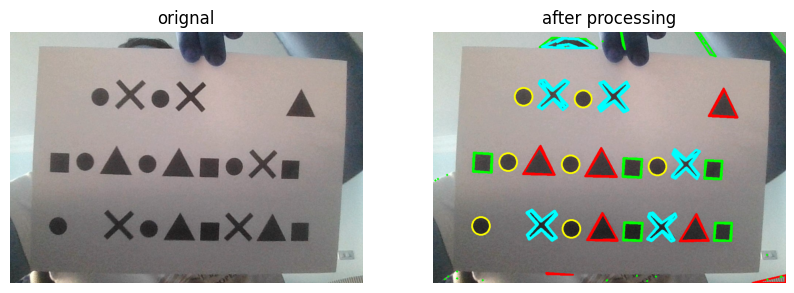

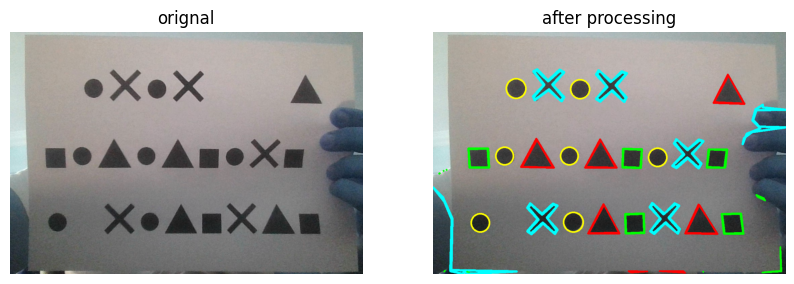

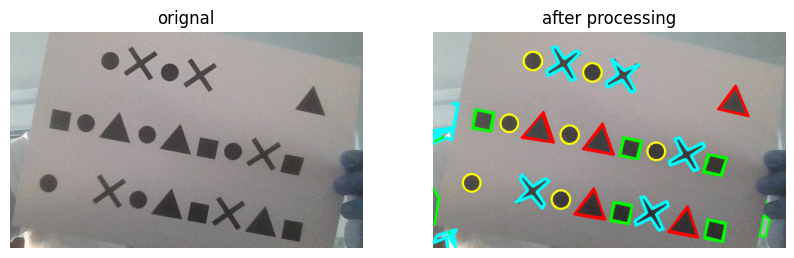

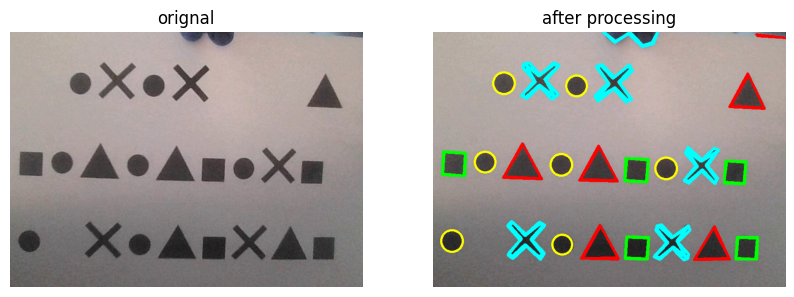

In [16]:
try_all_images(detect_shapes , "detect_shapes")